In [775]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students = pd.read_csv('stud_math.csv')

In [776]:
display(students)
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [777]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [859]:
for i in students.columns:
    #заменим во всех столбцах значения NaN на None
    students.loc[:,i] = students.loc[:,i]\
            .apply(lambda x: None if pd.isnull(x) else x)
    
def processing_object(cols):
    for col in cols:
        
        labels = students.loc[:,col].value_counts(dropna=False).index
              
        sum_null = students.loc[:,col].isna().sum()
        unique_value = len(students.loc[:,col].unique())
        
        print('В столбце', col.upper(),'количество уникальных значений:',
              unique_value)
        
        print('Значения:',students.loc[:,col].unique())
        
        print('Количество пустых значений:',sum_null)
        
        print('Значения в процентах:\n',
            round(students.loc[:,col].\
                  value_counts(normalize=True,dropna=False),3)*100,'\n')
        print(labels)
        fig = plt.figure()
        axes = fig.add_axes([0,0,1,1])
        
        axes.pie(students.loc[:,col].value_counts(dropna=False),
                                         labels=labels, autopct='%1.1f%%')
        
        plt.show()
        print('------------------------------------------------------------\n')
        

        
def del_outliers(cols):
    for col in cols:
        
        Q1 = students.loc[:,col].quantile(q=0.25, interpolation='midpoint')
        Q2 = students.loc[:,col].quantile(q=0.5, interpolation='midpoint')
        Q3 = students.loc[:,col].quantile(q=0.75, interpolation='midpoint')
        IQR = Q3-Q1
        
        df = students[~(students.loc[:,col]>Q3+1.5*IQR) |\
                                    (students.loc[:,col]<Q1-1.5*IQR)]
        return df
    
    
def processing_float_int(cols):
    for col in cols:
        
        unique_value = len(students.loc[:,col].unique())
        sum_null = students.loc[:,col].isna().sum()
        print(col.upper(),end='\n')
        print('Уникальные значения:',students.loc[:,col].unique())
        print('Количество уникальных значений:',unique_value)
        print('Количество пустых значений:',sum_null)
        print(students.loc[:,col].value_counts(dropna=False),'\n')
        print('---------------------------------------------------------\n')
        
        
def replace_Nan(cols):
    for col in cols:
        students.loc[:,col] = students.loc[:,col].fillna(students.loc[:,col].mode().values[0])
        
                

def fill_Nan(cols):
    for col in cols:
            df_index = students[pd.isnull(students.loc[:,col])].index
            col_index = round(students.loc[:,col].value_counts(normalize=True)).index
            col_values = round(students.loc[:,col].value_counts(normalize=True)*students.loc[:,col].isna().sum()).values
            if len(df_index) > sum(col_values):
                col_values[0]+=1
            elif len(df_index) < sum(col_values):
                col_values[0]-=1
            print(col_index,end='\n')
            print(col_values)
            print('________________________\n')
            c=0
            for index,values in enumerate(col_values):
                for i in range(0,int(values)):
                    students.loc[df_index[c],col] = col_index[index]
                    c+=1

В столбце SCHOOL количество уникальных значений: 2
Значения: ['GP' 'MS']
Количество пустых значений: 0
Значения в процентах:
 GP    88.4
MS    11.6
Name: school, dtype: float64 

Index(['GP', 'MS'], dtype='object')


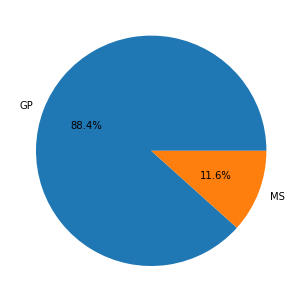

------------------------------------------------------------

В столбце SEX количество уникальных значений: 2
Значения: ['F' 'M']
Количество пустых значений: 0
Значения в процентах:
 F    52.7
M    47.3
Name: sex, dtype: float64 

Index(['F', 'M'], dtype='object')


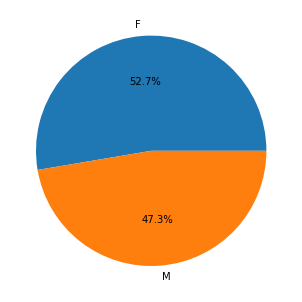

------------------------------------------------------------

В столбце ADDRESS количество уникальных значений: 3
Значения: ['U' None 'R']
Количество пустых значений: 17
Значения в процентах:
 U      74.7
R      21.0
NaN     4.3
Name: address, dtype: float64 

Index(['U', 'R', nan], dtype='object')


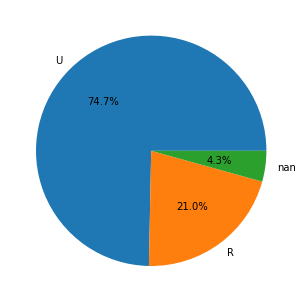

------------------------------------------------------------

В столбце FAMSIZE количество уникальных значений: 3
Значения: [None 'GT3' 'LE3']
Количество пустых значений: 27
Значения в процентах:
 GT3    66.1
LE3    27.1
NaN     6.8
Name: famsize, dtype: float64 

Index(['GT3', 'LE3', nan], dtype='object')


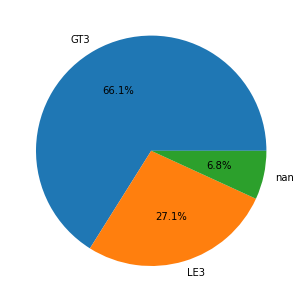

------------------------------------------------------------

В столбце PSTATUS количество уникальных значений: 3
Значения: ['A' None 'T']
Количество пустых значений: 45
Значения в процентах:
 T      79.5
NaN    11.4
A       9.1
Name: Pstatus, dtype: float64 

Index(['T', nan, 'A'], dtype='object')


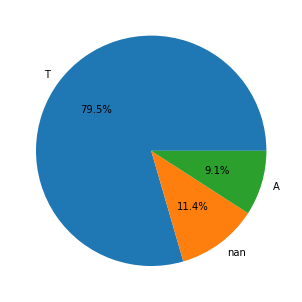

------------------------------------------------------------

В столбце MJOB количество уникальных значений: 6
Значения: ['at_home' 'health' 'other' 'services' 'teacher' None]
Количество пустых значений: 19
Значения в процентах:
 other       33.7
services    24.8
at_home     14.7
teacher     13.9
health       8.1
NaN          4.8
Name: Mjob, dtype: float64 

Index(['other', 'services', 'at_home', 'teacher', 'health', nan], dtype='object')


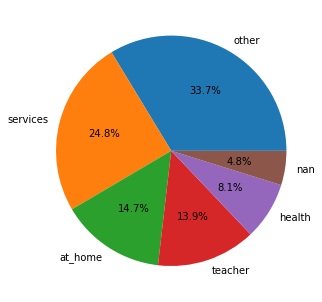

------------------------------------------------------------

В столбце FJOB количество уникальных значений: 6
Значения: ['teacher' 'other' None 'health' 'services' 'at_home']
Количество пустых значений: 36
Значения в процентах:
 other       49.9
services    25.8
NaN          9.1
teacher      7.3
at_home      4.1
health       3.8
Name: Fjob, dtype: float64 

Index(['other', 'services', nan, 'teacher', 'at_home', 'health'], dtype='object')


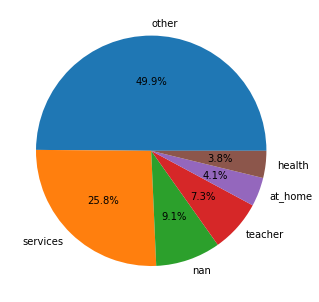

------------------------------------------------------------

В столбце REASON количество уникальных значений: 5
Значения: ['course' 'other' 'home' 'reputation' None]
Количество пустых значений: 17
Значения в процентах:
 course        34.7
home          26.3
reputation    26.1
other          8.6
NaN            4.3
Name: reason, dtype: float64 

Index(['course', 'home', 'reputation', 'other', nan], dtype='object')


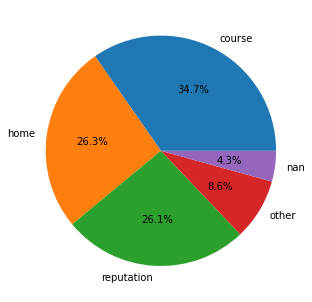

------------------------------------------------------------

В столбце GUARDIAN количество уникальных значений: 4
Значения: ['mother' 'father' 'other' None]
Количество пустых значений: 31
Значения в процентах:
 mother    63.3
father    21.8
NaN        7.8
other      7.1
Name: guardian, dtype: float64 

Index(['mother', 'father', nan, 'other'], dtype='object')


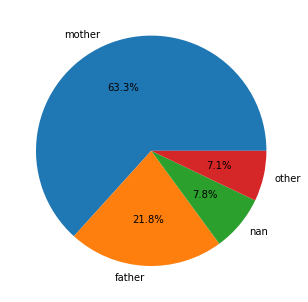

------------------------------------------------------------

В столбце SCHOOLSUP количество уникальных значений: 3
Значения: ['yes' 'no' None]
Количество пустых значений: 9
Значения в процентах:
 no     84.8
yes    12.9
NaN     2.3
Name: schoolsup, dtype: float64 

Index(['no', 'yes', nan], dtype='object')


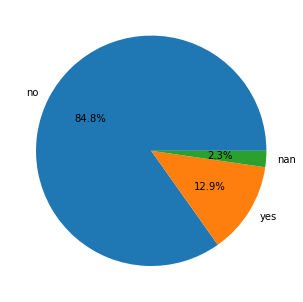

------------------------------------------------------------

В столбце FAMSUP количество уникальных значений: 3
Значения: ['no' 'yes' None]
Количество пустых значений: 39
Значения в процентах:
 yes    55.4
no     34.7
NaN     9.9
Name: famsup, dtype: float64 

Index(['yes', 'no', nan], dtype='object')


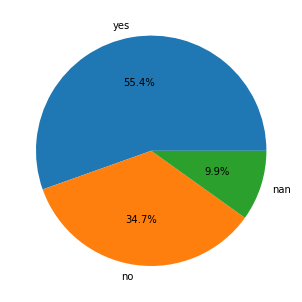

------------------------------------------------------------

В столбце PAID количество уникальных значений: 3
Значения: ['no' None 'yes']
Количество пустых значений: 40
Значения в процентах:
 no     50.6
yes    39.2
NaN    10.1
Name: paid, dtype: float64 

Index(['no', 'yes', nan], dtype='object')


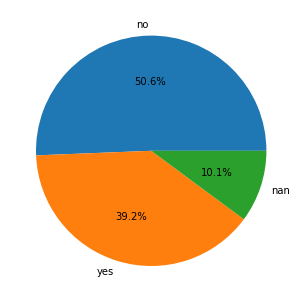

------------------------------------------------------------

В столбце ACTIVITIES количество уникальных значений: 3
Значения: ['no' 'yes' None]
Количество пустых значений: 14
Значения в процентах:
 yes    49.4
no     47.1
NaN     3.5
Name: activities, dtype: float64 

Index(['yes', 'no', nan], dtype='object')


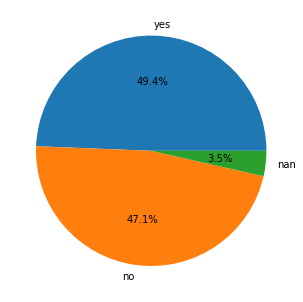

------------------------------------------------------------

В столбце NURSERY количество уникальных значений: 3
Значения: ['yes' 'no' None]
Количество пустых значений: 16
Значения в процентах:
 yes    75.9
no     20.0
NaN     4.1
Name: nursery, dtype: float64 

Index(['yes', 'no', nan], dtype='object')


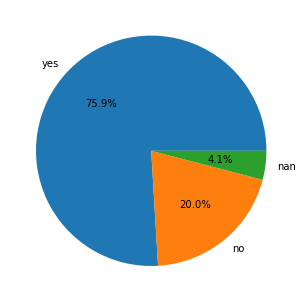

------------------------------------------------------------

В столбце HIGHER количество уникальных значений: 3
Значения: ['yes' None 'no']
Количество пустых значений: 20
Значения в процентах:
 yes    90.1
NaN     5.1
no      4.8
Name: higher, dtype: float64 

Index(['yes', nan, 'no'], dtype='object')


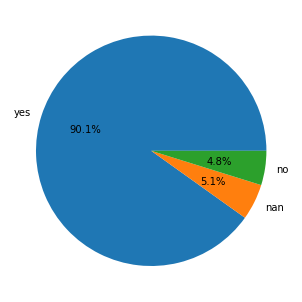

------------------------------------------------------------

В столбце INTERNET количество уникальных значений: 3
Значения: [None 'yes' 'no']
Количество пустых значений: 34
Значения в процентах:
 yes    77.2
no     14.2
NaN     8.6
Name: internet, dtype: float64 

Index(['yes', 'no', nan], dtype='object')


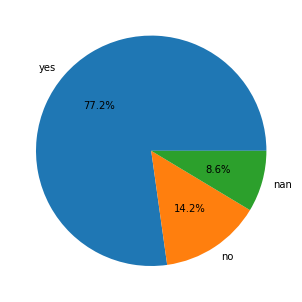

------------------------------------------------------------

В столбце ROMANTIC количество уникальных значений: 3
Значения: ['no' None 'yes']
Количество пустых значений: 31
Значения в процентах:
 no     60.8
yes    31.4
NaN     7.8
Name: romantic, dtype: float64 

Index(['no', 'yes', nan], dtype='object')


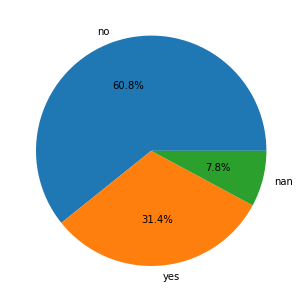

------------------------------------------------------------



In [860]:
processing_object(students.columns[students.dtypes == object])

In [861]:
processing_float_int(students.columns[(students.dtypes == 'int64') |
                                  (students.dtypes == 'float64')])

AGE
Уникальные значения: [18 17 15 16 19 22 20 21]
Количество уникальных значений: 8
Количество пустых значений: 0
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64 

---------------------------------------------------------

MEDU
Уникальные значения: [ 4.  1.  3.  2. nan  0.]
Количество уникальных значений: 6
Количество пустых значений: 3
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64 

---------------------------------------------------------

FEDU
Уникальные значения: [ 4.  1.  2.  3. 40. nan  0.]
Количество уникальных значений: 7
Количество пустых значений: 24
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64 

---------------------------------------------------------

TRAVELTIME
Уникальные значения: [ 2.  1.  3. nan  4.]
Количество уникальных значений: 5
Количество пустых значений: 28
1.0    242
2.0     96
NaN     28
3.0     2

In [782]:
# Удалим столбец 'studytime, granular', потому что это столбец, значения которого -3*studytime,
# поэтому корреляция у этих столбцов будет -1, значит имеем полное право удалить столбец, чтобы сэкономиться немного памяти
students = students.drop(['studytime, granular'],axis=1)

Посмотрим на значения в числовых столбцах, попытаемся найти выбросы, нехарактерные записи. Подумаем, что с этими данными делать.

В столбце absences, наблюдаются выбросы, т.к таких строк 17, и они значительно влияют на шум выборки, то можно избавиться от них(избавились от них, потому что людей, которые вообще не прогуливали занятия 111 человек, а которые являются выбросами 17, это в 6.5 раз меньше, и кол-во этих прогулов очень велико, что существенно влияет на прогноз. Ещё среди учеников с большим кол-вом прогулов есть студент, который прогулял 385 занятий, а его балл 85, такие данные сильно влияет на будущую модель). Также в этом столбце 12 значений NaN, сейчас посмотрим что можно с этим сделать. В столбце score выбросов не найдено, разве что, 6 значения NaN, пока что не будем с ними ничего делать.

In [783]:
numeric_var = ['absences','score']
students = del_outliers(numeric_var)
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,None,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [784]:
abs_median = students.absences.median()
abs_mean = students.absences.mean()
print(abs_median,'- Медиана')
print(abs_mean,'- Среднее арифметическое')

4.0 - Медиана
4.603825136612022 - Среднее арифметическое


Видно, что медиана меньше на 0.6. Среднее арифметическое высчиталось по формуле: students.absences.sum()/366. Заполним значения NaN медианой, тогда среднее арифметичское не изменится,

In [785]:
students.absences = students.absences.fillna(abs_median)
print(students.absences.median(),'- Медиана')
print(students.absences.mean(),'- Среднее арифметическое')

4.0 - Медиана
4.584656084656085 - Среднее арифметическое


Значения не изменились.

Столбец Age не трогаем, с ним всё впорядке. В колонке Medu 3 значения NaN.

In [786]:
students.Medu.value_counts(normalize=True)

4.0    0.330667
2.0    0.261333
3.0    0.242667
1.0    0.157333
0.0    0.008000
Name: Medu, dtype: float64

Кол-во значений 4,2,3 распределено примерно поровну. Вставим эти значения в NaN, по следующему принципу. Найдем моду для столбца Mjob(работы матери) для каждого значения Medu(4,2,3). Далее значения моды сравним со значением Mjob в строках, где пропущены Medu и поставим нужное значение 4,2 или 3.

In [787]:
display(students.groupby(['Medu'])['Mjob'].value_counts())
display(students[(pd.isnull(students.Medu)) | (students.Medu==0)])

Medu  Mjob    
0.0   at_home      2
      other        1
1.0   other       26
      at_home     25
      services     5
      health       1
2.0   other       43
      services    28
      at_home     21
      health       2
3.0   services    36
      other       34
      at_home      7
      health       5
      teacher      3
4.0   teacher     51
      health      24
      other       21
      services    21
      at_home      2
Name: Mjob, dtype: int64

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,None,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,None,no,no,no,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
193,GP,M,16,R,GT3,None,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,None,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,None,None,5.0,5.0,4.0,2.0,0.0,0.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,None,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0


Видно, что у значений 1 и 2 мода other, поэтому выбираем то Medu, где мода больше, это Medu равное 2. Так же ранее написал, что выбирать из значений 4,2 или 3. Значений 0 в Medu всего 3, заменим эти значения по такому же принципу(по моде в Mjob)

In [788]:
students.loc[[92,239],'Medu'] = 2.0
students.loc[193,'Medu'] = 3.0
students.loc[[127,324],'Medu'] = 1
students.loc[249,'Medu'] = 2

С колонками Fedu и Fjob, делаем то же самое.

In [789]:
students.Fedu.value_counts(normalize=True)

2.0     0.284507
3.0     0.250704
4.0     0.236620
1.0     0.219718
0.0     0.005634
40.0    0.002817
Name: Fedu, dtype: float64

Наблюдается странное значение 40, скорее всего это опечатка, заменим на 4. Найдём строки, в которых Fjob=0 или NaN. Заменим эти значения.

In [790]:
students.loc[students[students.Fedu==40].index[0],'Fedu']=4

display(students.groupby(['Fedu'])['Fjob'].value_counts())
display(students[pd.isnull(students.Fedu) | (students.Fedu==0)])

Fedu  Fjob    
0.0   other        2
1.0   other       48
      services    19
      at_home      3
      health       1
2.0   other       55
      services    25
      at_home      6
      health       1
3.0   other       48
      services    29
      at_home      3
      health       3
4.0   other       31
      teacher     24
      services    14
      health       8
      at_home      2
Name: Fjob, dtype: int64

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,None,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,None,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,None,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,None,4.0,3.0,3.0,5.0,4.0,30.0
76,GP,M,15,U,None,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,None,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,None,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,None,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,None,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0


In [791]:
for i in students[pd.isnull(students.Fedu) | (students.Fedu==0)].index:
    if students.loc[i,'Fjob'] == 'health':
        students.loc[i,'Fedu'] = 4.0
    elif students.loc[i,'Fjob'] == 'other':
        students.loc[i,'Fedu'] = 2.0
    elif students.loc[i,'Fjob'] == 'services':
        students.loc[i,'Fedu'] = 3.0
    elif students.loc[i,'Fjob'] == 'teacher':
        students.loc[i,'Fedu'] = 4.0
    else: students.loc[i,'Fedu'] = 2

Заменим в столбце traveltime 0 на 1,2,3 или 4. По таблице ниже видно, что время в пути меньше, если школа GP(GP занимает 90%, MS - 10%, из-за этого сложно делать выводы, они не на все 100% достоверны, но т.к значений NaN мало, можно попробовать), поэтому заменим на наиболее часто встречающиеся значения.

In [792]:
students.groupby(['school','address']).traveltime.value_counts(dropna=False)

school  address  traveltime
GP      R        1.0            28
                 2.0            17
                 NaN             5
                 3.0             5
                 4.0             3
        U        1.0           185
                 2.0            49
                 NaN            17
                 3.0             9
                 4.0             3
MS      R        2.0             8
                 3.0             7
                 1.0             5
                 NaN             2
                 4.0             1
        U        2.0             9
                 1.0             7
                 NaN             1
Name: traveltime, dtype: int64

In [793]:
display(students[pd.isnull(students.traveltime)])
for i in students[pd.isnull(students.traveltime)].index:
    if students.loc[i,'school'] == 'GP':
        students.loc[i,'traveltime'] = 1.0
    elif students.loc[i,'school'] == 'MS':
        students.loc[i,'traveltime'] = 2.0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,None,home,mother,NaN,1.0,0.0,no,yes,None,no,yes,yes,yes,None,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,None,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,None,None,course,mother,NaN,2.0,0.0,no,None,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,None,reputation,mother,NaN,2.0,NaN,yes,yes,None,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,None,other,course,mother,NaN,2.0,0.0,no,yes,None,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,None,2.0,2.0,at_home,other,None,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,None,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,yes,None,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [794]:
processing_float_int(['traveltime'])

TRAVELTIME
Уникальные значения: [2. 1. 3. 4.]
Количество уникальных значений: 4
Количество пустых значений: 0
1.0    257
2.0     92
3.0     22
4.0      7
Name: traveltime, dtype: int64 

---------------------------------------------------------



В столбцах 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health' заменим значения NaN на моду.

In [795]:
nominative_num_cols = ['studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']
replace_Nan(nominative_num_cols)

В столбце famrel удалим строку со значением -1.

In [796]:
students = students.drop([students[students.famrel==-1].index[0]],axis=0)

In [800]:
processing_float_int(nominative_num_cols)

STUDYTIME
Уникальные значения: [2. 3. 1. 4.]
Количество уникальных значений: 4
Количество пустых значений: 0
2.0    190
1.0     98
3.0     62
4.0     27
Name: studytime, dtype: int64 

---------------------------------------------------------

FAILURES
Уникальные значения: [0. 3. 1. 2.]
Количество уникальных значений: 4
Количество пустых значений: 0
0.0    305
1.0     44
3.0     15
2.0     13
Name: failures, dtype: int64 

---------------------------------------------------------

FAMREL
Уникальные значения: [4. 5. 3. 2. 1.]
Количество уникальных значений: 5
Количество пустых значений: 0
4.0    200
5.0     96
3.0     58
2.0     16
1.0      7
Name: famrel, dtype: int64 

---------------------------------------------------------

FREETIME
Уникальные значения: [3. 2. 4. 1. 5.]
Количество уникальных значений: 5
Количество пустых значений: 0
3.0    157
4.0    110
2.0     58
5.0     37
1.0     15
Name: freetime, dtype: int64 

---------------------------------------------------------

GOOUT


In [798]:
nominative_str_cols = ['address','famsize','Pstatus','Mjob','Fjob',
                      'reason','guardian','schoolsup','famsup','paid',
                      'activities','nursery', 'higher', 'internet', 'romantic']
fill_Nan(nominative_str_cols)

Index(['U', 'R'], dtype='object')
[13.  4.]
________________________

Index(['GT3', 'LE3'], dtype='object')
[18.  7.]
________________________

Index(['T', 'A'], dtype='object')
[35.  4.]
________________________

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')
[5. 4. 3. 3. 2.]
________________________

Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object')
[18. 10.  3.  2.  2.]
________________________

Index(['course', 'reputation', 'home', 'other'], dtype='object')
[6. 5. 4. 2.]
________________________

Index(['mother', 'father', 'other'], dtype='object')
[21.  7.  2.]
________________________

Index(['no', 'yes'], dtype='object')
[8. 1.]
________________________

Index(['yes', 'no'], dtype='object')
[21. 14.]
________________________

Index(['no', 'yes'], dtype='object')
[22. 17.]
________________________

Index(['yes', 'no'], dtype='object')
[7. 7.]
________________________

Index(['yes', 'no'], dtype='object')
[13.  3.]
________

В столбце ADDRESS количество уникальных значений: 2
Значения: ['U' 'R']
Количество пустых значений: 0
Значения в процентах:
 U    77.5
R    22.5
Name: address, dtype: float64 

Index(['U', 'R'], dtype='object')


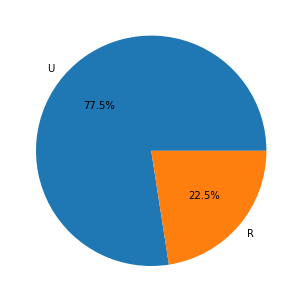

------------------------------------------------------------

В столбце FAMSIZE количество уникальных значений: 2
Значения: ['GT3' 'LE3']
Количество пустых значений: 0
Значения в процентах:
 GT3    70.6
LE3    29.4
Name: famsize, dtype: float64 

Index(['GT3', 'LE3'], dtype='object')


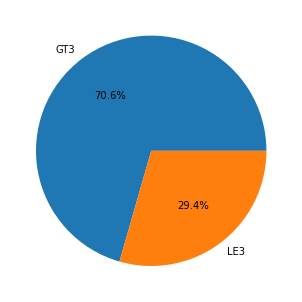

------------------------------------------------------------

В столбце PSTATUS количество уникальных значений: 2
Значения: ['A' 'T']
Количество пустых значений: 0
Значения в процентах:
 T    90.5
A     9.5
Name: Pstatus, dtype: float64 

Index(['T', 'A'], dtype='object')


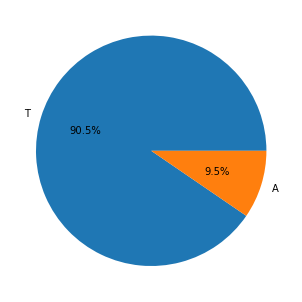

------------------------------------------------------------

В столбце MJOB количество уникальных значений: 5
Значения: ['at_home' 'health' 'other' 'services' 'teacher']
Количество пустых значений: 0
Значения в процентах:
 other       35.0
services    24.9
at_home     15.9
teacher     15.1
health       9.0
Name: Mjob, dtype: float64 

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')


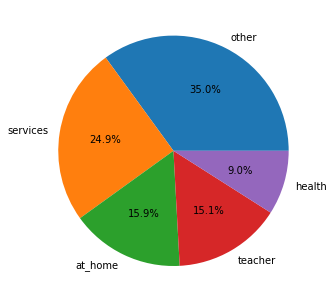

------------------------------------------------------------

В столбце FJOB количество уникальных значений: 5
Значения: ['teacher' 'other' 'health' 'services' 'at_home']
Количество пустых значений: 0
Значения в процентах:
 other       55.2
services    27.6
teacher      8.0
at_home      4.8
health       4.5
Name: Fjob, dtype: float64 

Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object')


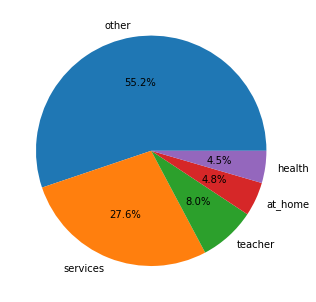

------------------------------------------------------------

В столбце REASON количество уникальных значений: 4
Значения: ['course' 'other' 'home' 'reputation']
Количество пустых значений: 0
Значения в процентах:
 course        37.4
reputation    27.3
home          26.0
other          9.3
Name: reason, dtype: float64 

Index(['course', 'reputation', 'home', 'other'], dtype='object')


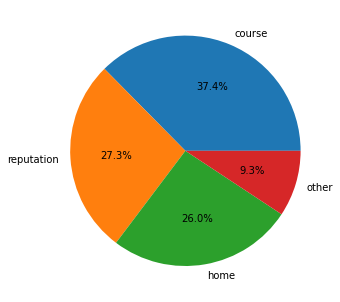

------------------------------------------------------------

В столбце GUARDIAN количество уникальных значений: 3
Значения: ['mother' 'father' 'other']
Количество пустых значений: 0
Значения в процентах:
 mother    68.4
father    24.4
other      7.2
Name: guardian, dtype: float64 

Index(['mother', 'father', 'other'], dtype='object')


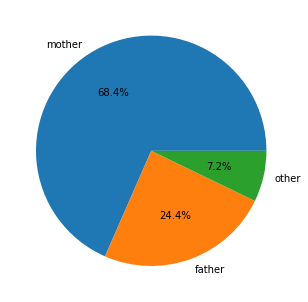

------------------------------------------------------------

В столбце SCHOOLSUP количество уникальных значений: 2
Значения: ['yes' 'no']
Количество пустых значений: 0
Значения в процентах:
 no     87.0
yes    13.0
Name: schoolsup, dtype: float64 

Index(['no', 'yes'], dtype='object')


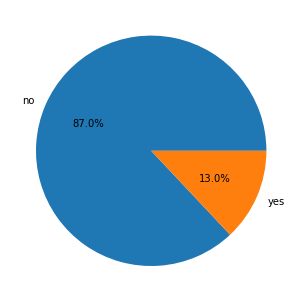

------------------------------------------------------------

В столбце FAMSUP количество уникальных значений: 2
Значения: ['no' 'yes']
Количество пустых значений: 0
Значения в процентах:
 yes    61.0
no     39.0
Name: famsup, dtype: float64 

Index(['yes', 'no'], dtype='object')


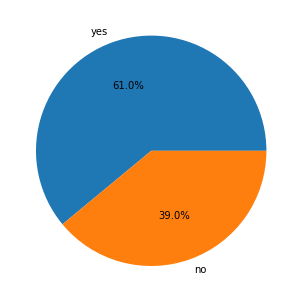

------------------------------------------------------------

В столбце PAID количество уникальных значений: 2
Значения: ['no' 'yes']
Количество пустых значений: 0
Значения в процентах:
 no     57.3
yes    42.7
Name: paid, dtype: float64 

Index(['no', 'yes'], dtype='object')


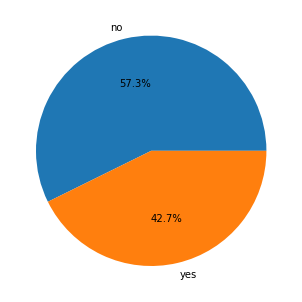

------------------------------------------------------------

В столбце ACTIVITIES количество уникальных значений: 2
Значения: ['no' 'yes']
Количество пустых значений: 0
Значения в процентах:
 yes    52.3
no     47.7
Name: activities, dtype: float64 

Index(['yes', 'no'], dtype='object')


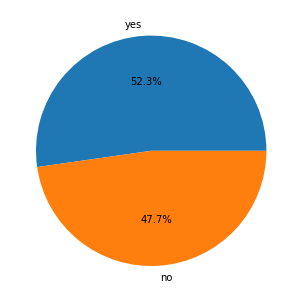

------------------------------------------------------------

В столбце NURSERY количество уникальных значений: 2
Значения: ['yes' 'no']
Количество пустых значений: 0
Значения в процентах:
 yes    79.3
no     20.7
Name: nursery, dtype: float64 

Index(['yes', 'no'], dtype='object')


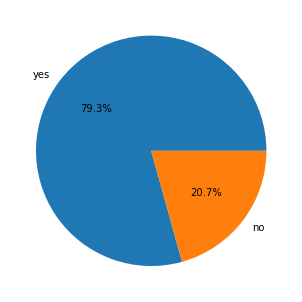

------------------------------------------------------------

В столбце HIGHER количество уникальных значений: 2
Значения: ['yes' 'no']
Количество пустых значений: 0
Значения в процентах:
 yes    95.0
no      5.0
Name: higher, dtype: float64 

Index(['yes', 'no'], dtype='object')


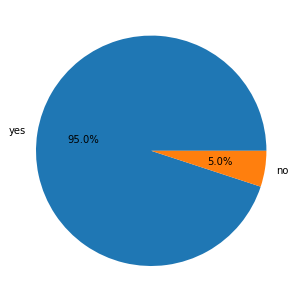

------------------------------------------------------------

В столбце INTERNET количество уникальных значений: 2
Значения: ['yes' 'no']
Количество пустых значений: 0
Значения в процентах:
 yes    84.1
no     15.9
Name: internet, dtype: float64 

Index(['yes', 'no'], dtype='object')


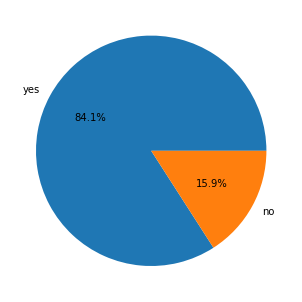

------------------------------------------------------------

В столбце ROMANTIC количество уникальных значений: 2
Значения: ['no' 'yes']
Количество пустых значений: 0
Значения в процентах:
 no     67.1
yes    32.9
Name: romantic, dtype: float64 

Index(['no', 'yes'], dtype='object')


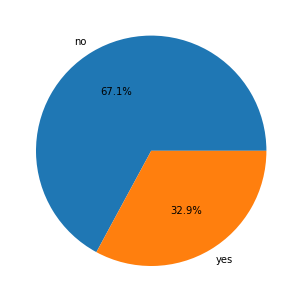

------------------------------------------------------------



In [799]:
processing_object(nominative_str_cols)

In [773]:
nominative_str_cols = ['address','famsize','Pstatus','Mjob','Fjob',
                      'reason','guardian','schoolsup','famsup','paid',
                      'activities','nursery', 'higher', 'internet', 'romantic']
fill_Nan(nominative_str_cols)

Index(['U', 'R'], dtype='object')
[13.  4.]
________________________

Index(['GT3', 'LE3'], dtype='object')
[19.  8.]
________________________

Index(['T', 'A'], dtype='object')
[40.  5.]
________________________

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')
[6. 5. 3. 3. 2.]
________________________

Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object')
[19. 10.  3.  2.  2.]
________________________

Index(['course', 'home', 'reputation', 'other'], dtype='object')
[5. 5. 5. 2.]
________________________

Index(['mother', 'father', 'other'], dtype='object')
[22.  7.  2.]
________________________

Index(['no', 'yes'], dtype='object')
[8. 1.]
________________________

Index(['yes', 'no'], dtype='object')
[24. 15.]
________________________

Index(['no', 'yes'], dtype='object')
[23. 17.]
________________________

Index(['yes', 'no'], dtype='object')
[7. 7.]
________________________

Index(['yes', 'no'], dtype='object')
[13.  3.]
________

В столбце score 37 значений "0" и 6 значений NaN, объединим строки с этими значениями в новый DataFrame и удалим из students.
Делаем так, потому что значения "0" сильно влияют на мат. показания и будущую модель. Заменять такие значения медианой неправильно, т.к человек мог и вправду сдать экзамен на 0 баллов или вовсе не прийти на него, заменив их, мы испортим реальную картину. 

In [807]:
processing_float_int(['score'])

SCORE
Уникальные значения: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan]
Количество уникальных значений: 18
Количество пустых значений: 6
50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
70.0     27
40.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
NaN       6
85.0      5
95.0      5
100.0     1
Name: score, dtype: int64 

---------------------------------------------------------



In [817]:
bad_students = students[(pd.isnull(students.score)) | (students.score == 0)]
students.drop(students[(pd.isnull(students.score)) | (students.score == 0)].index, inplace=True)